
# PROBIBILITY



Probibility Mass function

x = (n of x) p^x * (1-p)^n-x

USE:
cdf - when calulating the probability something is more or less than a give point
pdf - is used for plotting the probability in the graph
ppf - is used for calulating percentiles




In [1]:
import pandas as pd #library for data manipulation and analysis
import numpy as np #library used for working with arrays
import matplotlib.pyplot as plt #library for plots and visualizations
import seaborn as sns #library for visualizations

%matplotlib inline

import scipy.stats #library contains a number of probibility distributions and statistical functions



In [2]:

#BINOMIAL PROBABILITIES

"""
summarizes the number of trials, or observations when each trial has the same probability 
of attaining one particular value. Binomial distribution determines the probability of 
observing a specified number of successful outcomes in a specified number of trials.

"""

#Example: setting up the parameters

#declare sample size
n = 10

#declare probibility
p = .80

#declare the different possible number of visitors selected in an array
k = np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [3]:
from scipy.stats import binom

#use binom to generate the probability distribution
binomial = binom.pmf(k=k, n=n, p=p) #pmf is probibility mass function
binomial

#note it will produce the probabilities for the array we made

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

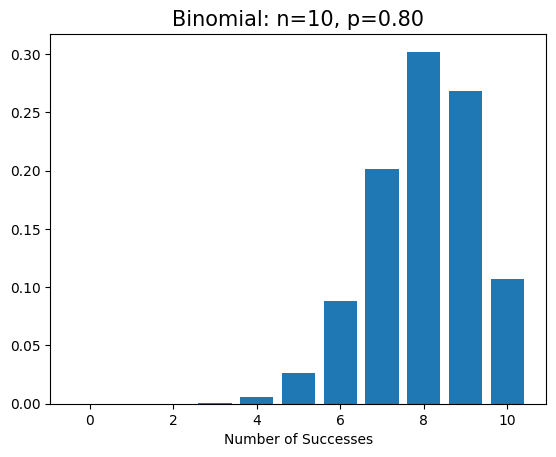

In [4]:
#plot the propability distribution

plt.bar(k, binomial)
plt.title("Binomial: n=%i, p=%.2f" % (n, p), fontsize=15)
plt.xlabel("Number of Successes")
plt.show()

In [ ]:
#what does the above mean?  the chance that 8 people will buy the product is about 30%
#that is the highest probability

In [6]:
binomial[10] #produces the probability that EVERYONE will buy

0.10737418240000006

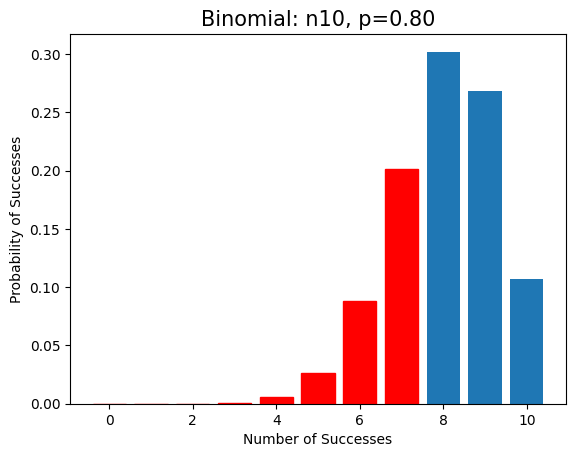

In [7]:

#Cumulative distribution function - a method used to describe the distribution of multivariate
##random variables.  It adds up all the probabilities

barl = plt.bar(k, binomial)
plt.title("Binomial: n%i, p=%.2f" % (n,p), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")
for i in range(0,8):
    barl[i].set_color("r")
plt.show()

In [8]:
#calculate cdf, the below is the probability that it will be 7 or less
binom.cdf(k=7, n=n, p=p)



0.32220047359999987


An interpritation of the above is on average if you randomly chose a day of the week to 
consistently check and see how many people were buying th eproduct in the store, it would 
always be about 32% of the poeple that come into the store

Inversly the probability that it would be 8 or more people would be 1-.32 = .68

Let's change the probability of success to buy a product to different values
and visualize the shape of the distribution

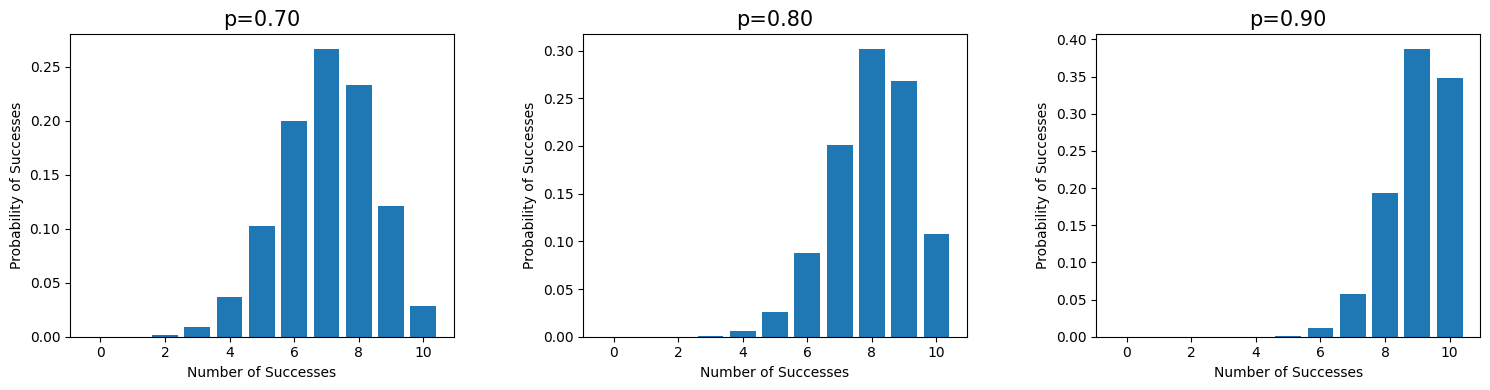

In [10]:


plt.figure(figsize=(15,4))

plt.subplot(131)
binomial_70 = binom.pmf(k,n,p=0.7)

#plot the distribution of the same
plt.bar(k, binomial_70)
plt.title("p=%.2f" % (0.7), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(132)
binomial_80 = binom.pmf(k,n,p=0.8)

#plot the distribution of the same
plt.bar(k, binomial_80)
plt.title("p=%.2f" % (0.8), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.subplot(133)
binomial_90 = binom.pmf(k,n,p=0.9)

#plot the distribution of the same
plt.bar(k, binomial_90)
plt.title("p=%.2f" % (0.9), fontsize=15)
plt.xlabel("Number of Successes")
plt.ylabel("Probability of Successes")

plt.tight_layout(w_pad=5)



# UNIFORM DISTRIBUTIONS



a type of probability distribution in which all outcomes are equally likely. 
A deck of cards has within it uniform distributions because the likelihood of drawing a 
heart, a club, a diamond, or a spade is equally likely

There are 2 types of Uniform Distribution

1. Discrete Uniform Distribution - can take a finite number of values, each value has an equal
chance of being selected

2. Continuous Uniform Distribution - can take any value in a specified range






# Continuous Uniform Distribution


Say a software engineer wants to fix a bug in the software

x = the time needed to fix the bugs

x is a continuous random variable.  we will see the distribution of x below

1. find the probability that the randomly selected software debugging requires less than 3 hours
2. find the probability that the randomly selected software debugging requires more than 2 hours
3. find the 50th percentile of the software debugging time



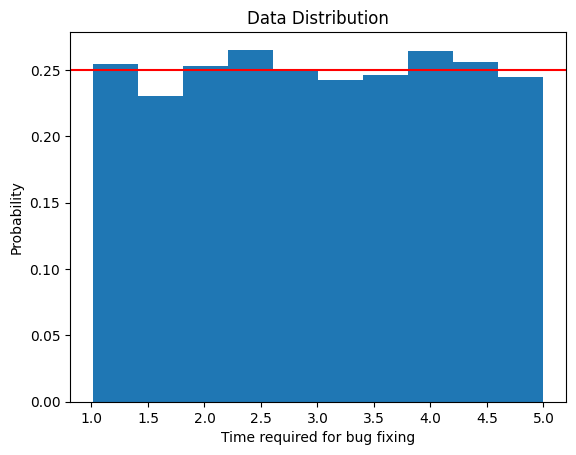

In [12]:


debugging = pd.read_csv("debugging.csv")


#visualize the distribution of the time needed for the bug fixing

plt.hist(debugging["Time Taken to fix the bug"], density=True)
plt.axhline(1/4, color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

#see the below, we can't make any predictions with the data, soooo
#we will have to use a function to help us called the PROBABILITY DENSITY FUNCTION


/var/folders/x2/r78cv1hs2gnf0hrr47czw8400000gn/T/ipykernel_56420/3340220349.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(debugging["Time Taken to fix the bug"])


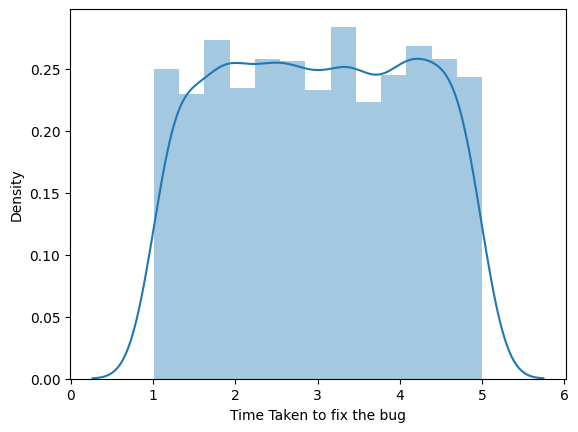

In [13]:
#using the PROBABILITY DENSITY FUNCTION

sns.distplot(debugging["Time Taken to fix the bug"])
plt.show()

In [14]:
#taken into consideration that the uniformity of the plot is valid we say that it is
#equaly valid that the range is 1 to 5

from scipy.stats import uniform

#we use the uniform.pdf() function to generate a probability distribution
x = np.linspace(1,5,50)
#the below is the continuous form of distribution, it start at 1 and takes 4 steps after that
#thus ending at 5
probs = uniform.pdf(x, loc=1, scale=4)

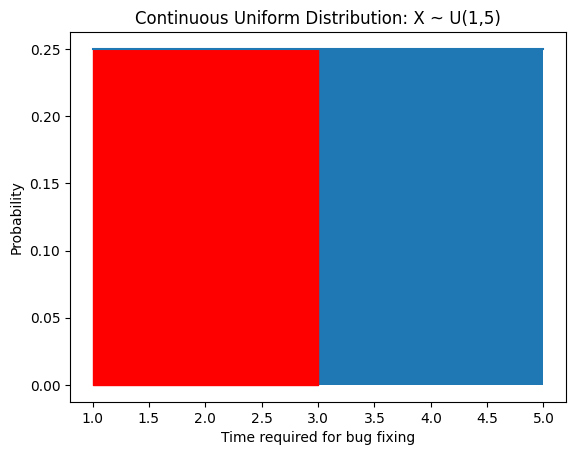

In [18]:
# now we will create a visualization to plot the above pdf
#linspace is (start, stop, total num)
x1=np.linspace(1,3,25) #we define the point at which we want to plot from with 3 here
plt.plot(x,probs)
plt.fill_between(x,probs)
#this plots the chance it will be more or less than 3
plt.fill_between(x1,uniform.pdf(x=x1, loc=1,scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [16]:
uniform.cdf(x=3, loc=1, scale=4) #this is the chance that x is less that 3 is 50%

0.5

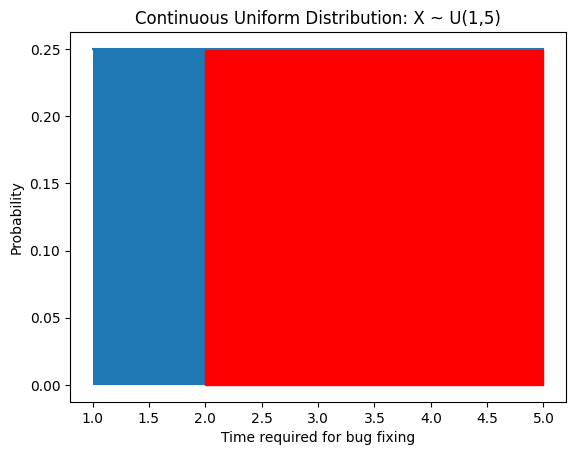

In [19]:
# now we will create a visualization to plot the above pdf
#linspace is (start, stop, total num)
x1=np.linspace(2,5,20) #we define the point at which we want to plot from with 3 here
plt.plot(x,probs)
plt.fill_between(x,probs)
#this plots the chance it will greater than 2 as defined above
plt.fill_between(x1,uniform.pdf(x=x1, loc=1,scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [22]:
1-uniform.cdf(x=2, loc=1, scale=4) #this is the chance that x is greater than 2, 75%

0.75

In [23]:
#calculate the 50th percentile
uniform.ppf(q=0.5, loc=1, scale=4)

3.0